In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('whitegrid',
              {'grid.linestyle': ':', 'grid.color': 'red', 'axes.edgecolor': '0.5',
               'axes.linewidth': 1.2, 'legend.frameon': True})

import os

import pickle

In [2]:
npart = 1000
nturns = 20000

In [3]:
tune_range_qx = np.arange(18.55, 18.95 + 0.01, 0.01)
tune_range_qy = tune_range_qx

e_seed = 1

In [20]:
losses = np.zeros((len(tune_range_qx), len(tune_range_qy)))
std_x = np.zeros_like(losses)
std_y = np.zeros_like(losses)

for i, qx in enumerate(tune_range_qx):
    for j, qy in enumerate(tune_range_qy):
        qqx, qqy = int(np.round((qx%1) * 100)), int(np.round((qy%1) * 100))

        filename_error_table = "errors_{qqx}_{qqy}_{eseed:d}".format(
            qqx=qqx, qqy=qqy, eseed=e_seed)

        try:
            store = pickle.load(open('results/' + filename_error_table + '_summary.p', 'rb'))
        except FileNotFoundError:
            try:
                store = pickle.load(open('results_old/' + filename_error_table + '_summary.p', 'rb'))
            except FileNotFoundError:
                losses[i, j] = np.nan
                std_x[i, j] = np.nan
                std_y[i, j] = np.nan
                continue
        
        losses[i, j] = store['losses']
        std_x[i, j] = store['std_x']
        std_y[i, j] = store['std_y']

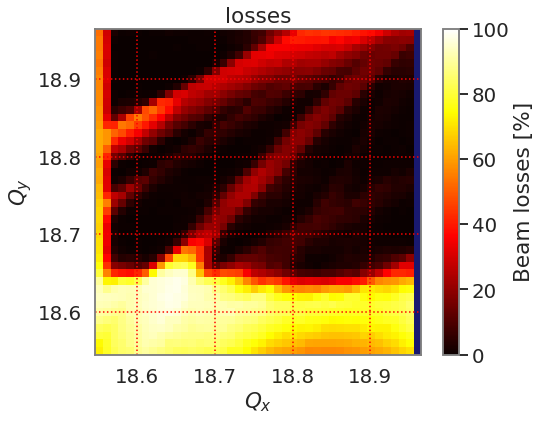

In [21]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=100,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_100.pdf', bbox_inches='tight')

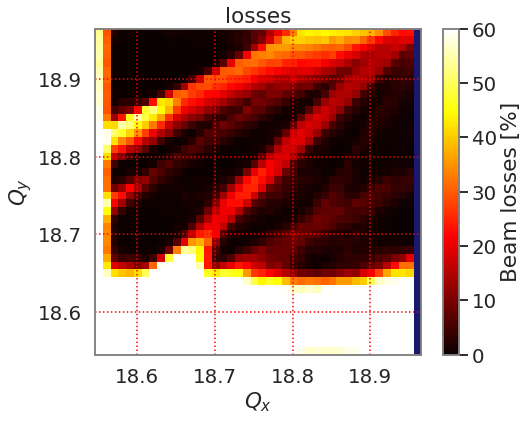

In [22]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=60,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_60.pdf', bbox_inches='tight')

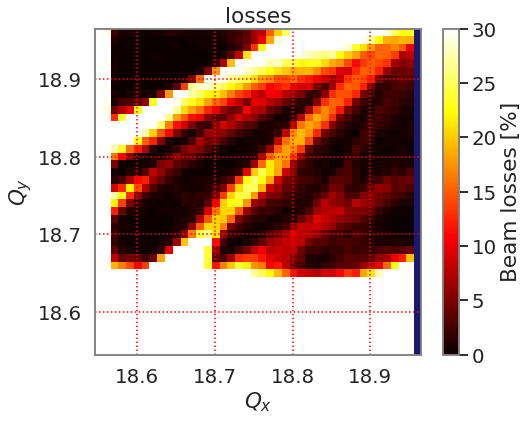

In [23]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_30.pdf', bbox_inches='tight')

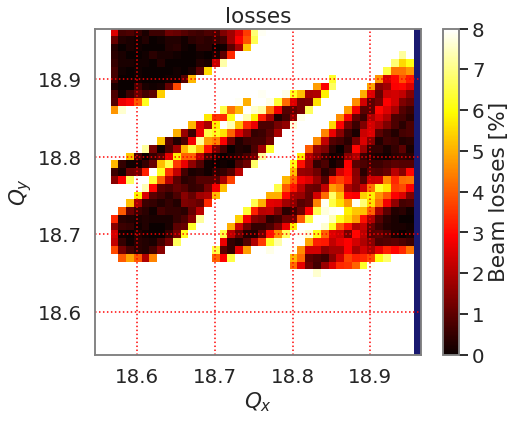

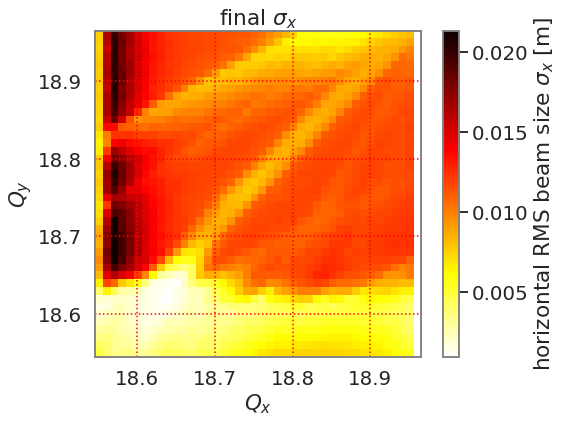

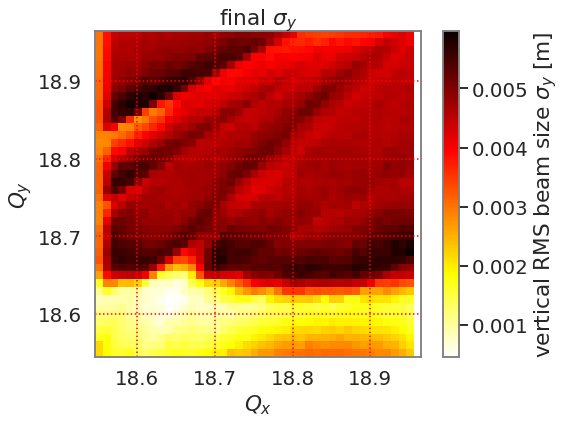

In [24]:
dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
extent = [
    tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
    tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
]

plt.figure(figsize=(8, 6))
plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=8,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_x$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_x.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('horizontal RMS beam size $\sigma_x$ [m]')
plt.savefig('tunescan_eseed1_sigx.pdf', bbox_inches='tight')

plt.figure(figsize=(8, 6))
plt.title('final $\sigma_y$')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.imshow(
    std_y.T, origin='lower', 
    extent=extent, cmap=plt.get_cmap('hot_r'))
cbar = plt.colorbar()
cbar.set_label('vertical RMS beam size $\sigma_y$ [m]')
plt.savefig('tunescan_eseed1_sigy.pdf', bbox_inches='tight')

In [25]:
qqx, qqy = np.meshgrid(tune_range_qx[:-1], tune_range_qy)

np.savetxt('results.dat', 
           np.vstack(
               (qqx.flatten(), 
                qqy.flatten(), 
                losses.T[:, :-1].flatten())
           ).T, fmt='%.2f', newline='\r\n', header='Qx\tQy\tSurvival', delimiter='\t')

In [26]:
from tune_diagram import ResonanceLines

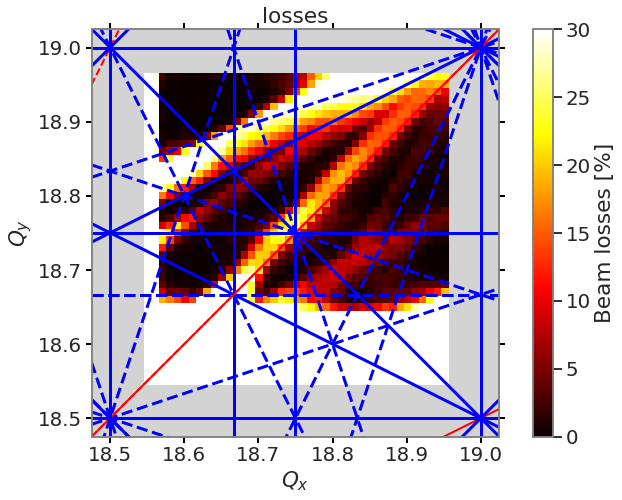

In [27]:
fig = plt.figure(figsize=(12, 7.5))

extent_x = (18.475, 19.025)
extent_y = (18.475, 19.025)

resonances = ResonanceLines(extent_x, 
                            extent_y,
                            range(1, 4+1), 6) #1
resonances.plot_resonance(fig)
plt.gca().set_aspect('equal')

dqx, dqy = np.diff(tune_range_qx)[0], np.diff(tune_range_qy)[0]
# extent = [
#     tune_range_qx[0] - dqx/2., tune_range_qx[-1] + dqx/2.,
#     tune_range_qy[0] - dqy/2., tune_range_qy[-1] + dqy/2.,
# ]

plt.gca().tick_params(direction='out', length=6, width=2, color='black', reset=True)
plt.grid(False)

plt.title('losses')
plt.xlabel('$Q_x$')
plt.ylabel('$Q_y$')
plt.gca().set_facecolor('lightgray') #'midnightblue')
plt.imshow(
    100 - losses.T / 10., origin='lower', vmin=0, vmax=30,
    extent=extent, cmap=plt.get_cmap('hot'))
cbar = plt.colorbar()
cbar.set_label('Beam losses [%]')
plt.savefig('tunescan_eseed1_losses_30_lines.pdf', bbox_inches='tight')